# **Projet Prédiction de temps de trajet d'un taxi à New York | RUSAK & LEVY-VALENSI G3**

## 1) Identifier et définir le problème

Notre projet consiste donc à créer une prédiction de temps de trajet des taxis new-yorkais en fonction de diverses données fournies dans différents data-sets.

Les entrées du modèles seront des taxi new-yorkais avec les dates et heures de départ, des coordonnées de départ et les coordonnées d'un point d'arrivée.

Quant aux sorties du modèle, nous obtiendrons des durées estimées de temps de trajet.

Le problème du projet est une régression et non une classification car il fait appel à une des variables continues (un nombre) et non discrètes (une catégorie). En effet on ne recherche pas à classer des données mais à prédire une donnée à partir d'autres données (temps de trajet en fonction de la distance à parcourir).

Importation des librairies nécessaires :

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from math import sin, cos, sqrt, atan2, radians
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

## 2) Compréhension des données :





### Création du dataset à partir du fichier test.csv

In [4]:
test = pd.read_csv('./test.csv')
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


### Création du dataset à partir du fichier train.csv

In [5]:
train = pd.read_csv('./train.csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


### Quel est le format des données



Les données sont presentées sous la forme de fichier .csv, ce sont des tableaux de données compatibles pour exportation en data-sets python.
Nous avons deux fichiers : le premier (test.csv) est le fichier destiné à la prédiction et le deuxième (train.csv) est un fichier sous la forme mais contenant déjà la variable à prédire; le temps de trajet.

### Quelle est la taille de la base de données

In [6]:
print("Nombre de lignes du data-set test :",test.shape[0])

Nombre de lignes du data-set test : 625134


In [7]:
print("Nombre de colonnes du data-set test :",test.shape[1])

Nombre de colonnes du data-set test : 9


In [8]:
print("Nombre de lignes du data-set train :",train.shape[0])

Nombre de lignes du data-set train : 1458644


In [9]:
print("Nombre de colonnes du data-set train :",train.shape[1])

Nombre de colonnes du data-set train : 11


### Les données comprennent-elles des caractéristiques pertinentes pour ma problèmatique ?

In [10]:
list(test.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag']

Les données comprennent des caractéristiques pertinentes pour notre problèmatique car nous y retrouvons des données d'entrée du modèle comme les identifiants des taxis et donc des trajets, une date ainsi qu'un horaire de départ et d'arrivée (pickup_datetime, dropoff_datetime), une latitude et une longitude de départ (pickup_latitude, pickup_longitude) et d'arrivée (dropoff_latitude, dropoff_longitude) ainsi que le temps de trajet (trip_duration).
Les autres données du dataset test ne nous sont à priori d'aucune utilité dans la prédiction du temps de trajet.
Ce dataset comprend suffisament de données fiables pour produire un résultat concluant, nous n'avons donc pas besoin d'en introduire d'autres.

### Qualité des données

Le modèle que nous avons choisi par la suite requiert une certaine qualité de données pour être en mesure de fournir une approximation la plus précise possible. En effet les dates fournies doivent être accompagnées d'un horaire comportant au moins heure et minute, et les coordonnées gps doivent être les plus précises possible pour calculer au mieux une distance de trajet, ce qui est nécessaire pour estimer correctement le temps de trajet.

Dans un soucis de temps d'éxécution, vous remarquerez plus bas que nous avons mit à votre disposition deux possibilités de prédiction, une s'appuyant sur toutes les données des DataSets et l'autre n'en selectionnant qu'une petite partie.

### Quels sont les types de données

In [11]:
test.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

In [12]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

On peut voir que l'identifiant du taxi est un objet, la date et l'horaire de départ sont des objets, sans doute des DateTime et les coordonnées sont toutes des réels. Ainsi les objets sont des types symboliques et les réels sont des types numériques.

### Statistiques de base pour les attributs clés

In [13]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [14]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Attributs sans intérêt

Les attributs sans réel intérêt pour la résolution du problème sont :
- l'identifiant du vendeur (vendor_id)
- le nombre de passager (passenger_count)
- 'store_and_fwd_flag'


Les autres attributs sont donc bien entendu pertinents pour notre projet.

### Valeurs manquantes

In [15]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [16]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

On remarque ici que nous n'aurons pas de problème de données manquantes. Nous n'aurons donc pas besoin d'en créer ou d'en ignorer ni d'envisager un mode de traitement.

## 3) Préparation des données

### Conversion des dates et horaires

Afin d'analyser au mieux les données mises à notre disposition, nous avons décidé de séparer les pickup_datetime en mois, jour de la semaine, heure, minute et année pour ensuite réaliser une étude d'affluence qui aura des conséquences sur l'estimation du temps de trajet.

In [42]:
#Conversion du format des dates
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

#Création des éléments séparés des dates
train['month'] = train.pickup_datetime.dt.month
train['weekday'] = train.pickup_datetime.dt.weekday
train['hour'] = train.pickup_datetime.dt.hour
train['minute'] = train.pickup_datetime.dt.minute
train['year'] = train.pickup_datetime.dt.year

test['month'] = test.pickup_datetime.dt.month
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['year'] = test.pickup_datetime.dt.year

In [18]:
print('Année :',train['year'].sort_values().unique())
print('Heures :',train['hour'].sort_values().unique())
print('Mois :',train['month'].sort_values().unique())
print('Jours :',train['weekday'].sort_values().unique())

Année : [2016]
Heures : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Mois : [1 2 3 4 5 6]
Jours : [0 1 2 3 4 5 6]


On remarque donc que le dataset ne concerne qu'une année : l'année 2016.
On remarque également que les données concernent chaque heure de chaque jour de la semaine mais qu'elles ne concernent que les 6 premiers mois de l'année.

### Affluence par heure

Le temps de trajet dépend-il du moment de la journée ?

Text(0.5, 1.0, 'Nombre de voyages par tranches horaire')

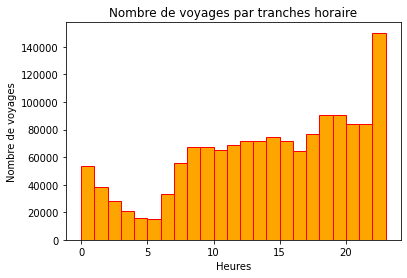

In [19]:
range = train['hour'].sort_values().unique()
plt.hist(train['hour'],range,edgecolor='red',color='orange')
plt.xlabel("Heures")
plt.ylabel("Nombre de voyages")
plt.title('Nombre de voyages par tranches horaire')

Grâce à cet histogramme, on remarque que durant les 6 premiers mois de l'année 2016, l'affluence la plus importante en taxi est à partir de 18h jusqu'a minuit et avec un imposant pic à 23h. Le nombre de taxis sur la route peut alors augmenter pendant cette période et le temps de trajet pour chaque voyage également.

### Affluence par mois

Le temps de trajet peut-il dépendre du mois de l'année ?

Text(0.5, 1.0, 'Nombre de voyages par mois')

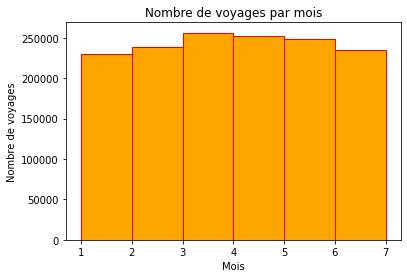

In [20]:
range = train['month'].sort_values().unique()
range2 = [1,2,3,4,5,6,7]
plt.hist(train['month'],range2,edgecolor='red',color='orange')
plt.xlabel("Mois")
plt.ylabel("Nombre de voyages")
plt.title('Nombre de voyages par mois')

Sur les données que nous avons, à savoir les 6 premiers mois de l'année 2016, on peut dire grace à cet histogramme que le mois aura peu d'importance sur le temps de trajet car l'affluence est à peu près la même pendant les 6 premiers mois.

### Affluence par jour

Le temps de trajet dépend-il du jour de la semaine ?

Text(0.5, 1.0, 'Nombre de voyages par jours de la semaine')

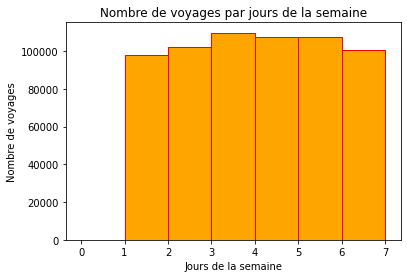

In [43]:
range = train['weekday'].sort_values().unique()
range2 = [0,1,2,3,4,5,6,7]
plt.hist(train['month'],range2,edgecolor='red',color='orange')
plt.xlabel("Jours de la semaine")
plt.ylabel("Nombre de voyages")
plt.title('Nombre de voyages par jours de la semaine')

Grace à cet histogramme, on peut dire que le jour de la semaine n'influe pas le temps de trajet car l'affluence est à peu près la même chaque jour. On remarque néanmoins que cela n'est pas vérifié pour le lundi car il semble qu'il n'y ait aucune données. Cependant, dans le dataset, ce jour est bien présent mais doit être en nombre limité par rapport aux autres, ce qui explique l'histogramme obtenu. On en déduit donc que la compagnie de taxi n'est pas en fonctionnement le lundi ou bien que pour certains trajets importants.

### Conclusion sur les affluences

Grace aux études d'affluences réalisées ci-dessus, on peut en déduire que le temps de trajet d'un taxi new-yorkais peut être impacté en fonction de l'heure du jour en raison de l'affluence sur la route et du nombre de trajets, mais aussi par le jour de la semaine car en effet le lundi il semble impossible de prendre les taxis car ceux-ci ne sont pas en service.

### Calcul de la distance

Fonction de calcul de la distance parcourue en fonction des coordonnées.

In [22]:
def distance(long1, long2, lat1, lat2):

  # Approximation du royon de la Terre en km
  Rayon = 6373.0

  # Conversion des latitudes en radians
  lat1 = np.radians(lat1)
  lat2 = np.radians(lat2)

  # Conversion des longitudes en radians
  long1 = np.radians(long1)
  long2 = np.radians(long2)

  # Calcul de la différence entre latitudes et entre longitudes
  dif_long = long2 - long1
  dif_lat = lat2 - lat1

  a = np.sin(dif_lat /2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dif_long /2)**2

  c = 2 * np.arctan(np.sqrt(a), np.sqrt(1 - a))

  distance = Rayon * c

  return distance

Calcul des distances pour les deux datasets :

In [23]:
test['distance'] = distance(test['pickup_longitude'].values,
                            test['dropoff_longitude'].values,
                            test['pickup_latitude'].values,
                            test['dropoff_latitude'].values)

train['distance'] = distance(train['pickup_longitude'].values,
                            train['dropoff_longitude'].values,
                            train['pickup_latitude'].values,
                            train['dropoff_latitude'].values)

Nettoyage des données abbérantes :

In [41]:
test = test[(test.distance < 200)]
train = train[(train.distance < 200)]

In [24]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,week,weekday,hour,minute,year,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,11,0,17,24,2016,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,0,43,2016,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11,35,2016,6.387102
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,14,2,19,32,2016,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,12,5,13,30,2016,1.188962


### Calcul de la vitesse

In [25]:
train['vitesse'] = train.distance / ((train.trip_duration/3600))

In [26]:
train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,week,weekday,hour,minute,year,distance,vitesse
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,11,0,17,24,2016,1.498991,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,23,6,0,43,2016,1.806074,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,3,1,11,35,2016,6.387102,10.825597


# 4) Résolution du problème

## Régression par arbres de décisions

Nous avons choisi içi une régression par arbres de décisions car son but est de créer un modèle qui prédit la valeur d'une variable-cible depuis la valeur de plusieurs variables d'entrée.
De plus nous l'avons choisi car dans ce modèle une des variables d'entrée est sélectionnée à chaque nœud intérieur (ou interne, nœud qui n'est pas terminal) de l'arbre selon une méthode qui dépend de l'algorithme et qui sera discutée plus loin. Chaque arête vers un nœud-fils correspond à un ensemble de valeurs d'une variable d'entrée, de manière que l'ensemble des arêtes vers les nœuds-fils couvrent toutes les valeurs possibles de la variable d'entrée.
Ce dernier aspect nous permet donc contrairement à la régression linéaire de pouvoir prendre en compte les affluences vues ci-dessus.

### Préparation du DataSet d'entrées et de sorties pour l'apprentissage :

Le modèle choisi içi nécessite que les données soit divisées dans des ensemble de tests et d'apprentissage comme nous le faisons ci-dessous :

#### Choisissez ces colonnes si vous souhaitez que l'étude prenne en compte seulement les coordonnées et la distance :

In [27]:
columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'distance']

#### Choisissez ces colonnes si vous souhaitez que l'étude prenne en compte les affluences des heures, jours et mois :

In [28]:
#columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
#                    'dropoff_latitude', 'month' , 'hour','minute',
#                       'weekday', 'distance']

In [29]:
# Ne demande pas beaucoup de temps ni de ressources
temp = train[0:10000]
X_train = temp[columns]
y_train = temp['trip_duration']

#Si vous voulez une étude la plus complète possible, choisissez les instructions suivantes et commentez celle qui
#demandent moins de ressources
# DEMANDE BEAUCOUP DE TEMPS ET DE RESSOURCES

#X_train = train[columns]
#y_train = train['trip_duration']

### Prévisualisation du DataSet d'entrées pour l'apprentissage :

Ce DataSet contient les principales données nécessaires à la prédiction du temps de trajet, deux types de DataSet d'entrée ont retenu notre attention comme vous pourrez le voir ci-dessus.

In [30]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,-73.982155,40.767937,-73.964630,40.765602,1.498991
1,-73.980415,40.738564,-73.999481,40.731152,1.806074
2,-73.979027,40.763939,-74.005333,40.710087,6.387102
3,-74.010040,40.719971,-74.012268,40.706718,1.485965
4,-73.973053,40.793209,-73.972923,40.782520,1.188962
...,...,...,...,...,...
9995,-73.993889,40.756840,-73.949280,40.827789,8.740170
9996,-73.997223,40.719307,-73.986656,40.761303,4.755335
9997,-73.987190,40.760956,-73.982147,40.768261,0.916917
9998,-73.975090,40.756077,-73.968575,40.764622,1.097582


### Prévisualisation du DataSet de sorties attendues pour l'apprentissage :

Ce DataSet doit comporter les résultats et donc les sorties attendues du modèle, soit les temps de trajets.

In [31]:
y_train

0        455
1        663
2       2124
3        429
4        435
        ... 
9995     971
9996     932
9997     372
9998     295
9999     619
Name: trip_duration, Length: 10000, dtype: int64

### Création du modèle de régression :

In [32]:
# On utilise içi un modèle de régression par arbres de décisions
model = RandomForestRegressor() 

### Application du modèle aux données :

In [45]:
# On donne a la fonction de création du modèle les DataSets d'entrées et de sorties pour l'apprentissage.
model.fit(X_train, y_train)

RandomForestRegressor()

### Préparation du DataSet d'entrées pour le prédiction :

In [34]:
# Ne demande pas beaucoup de temps ni de ressources
temptest = test[0:10000]
X_test = temptest[columns]

#Si vous voulez une étude la plus complète possible, choisissez les instructions suivantes et commentez celle qui
#demandent moins de ressources
# DEMANDE PLUS DE TEMPS ET DE RESSOURCES

#X_test = test[columns]

### Prévisualisation du DataSet d'entrées pour l'apprentissage :

In [35]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,-73.988129,40.732029,-73.990173,40.756680,2.747288
1,-73.964203,40.679993,-73.959808,40.655403,2.760105
2,-73.997437,40.737583,-73.986160,40.729523,1.306565
3,-73.956070,40.771900,-73.986427,40.730469,5.270741
4,-73.970215,40.761475,-73.961510,40.755890,0.961143
...,...,...,...,...,...
9995,-73.952515,40.771515,-73.980957,40.747963,3.550356
9996,-73.966423,40.772259,-73.954704,40.778240,1.190376
9997,-73.986206,40.722450,-73.965805,40.693207,3.679578
9998,-73.948975,40.782070,-73.951927,40.777500,0.565892


### Exécution de la fonction de prédiction :

In [36]:
y_pred = model.predict(X_test)

### Vérification des tailles du DataSet obtenu :

In [37]:
X_test.index.shape, y_pred.shape

((10000,), (10000,))

### Création du DataSet Submission :

In [38]:
# Ouverture du fichier zip contenant le modèle de DataSet submission :
submission = pd.read_csv('./sample_submission.zip')

# A choisir si vous avez opté pour l'étude incomplète :
tempsub = submission[0:10000]
tempsub['trip_duration'] = y_pred
tempsub.head(10)

# A choisir si vous avez opté pour l'étude complète :
#submission['trip_duration'] = y_pred
#submission.head(10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,trip_duration
0,id3004672,895.25
1,id3505355,716.41
2,id1217141,407.85
3,id2150126,1304.72
4,id1598245,431.54
5,id0668992,1183.78
6,id1765014,1358.75
7,id0898117,993.82
8,id3905224,2359.30
9,id1543102,697.31


### Création du fichier de résultats :

In [39]:
# A choisir si vous avez opté pour l'étude incomplète :
tempsub.to_csv('submission.csv', index=False)

# A choisir si vous avez opté pour l'étude complète :
#submission.to_csv('submission.csv', index=False)

Le fichier submission.csv contenant les temps de trajet prédits à partir des données du fichier test.csv est maintenant crée dans votre répertoire !